<a href="https://colab.research.google.com/github/tobnie/gaze_predictor_nn/blob/main/train_nn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Load Package:


In [1]:
!pip install git+https://github.com/tobnie/gaze_predictor_nn.git

import gaze_predictor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/tobnie/gaze_predictor_nn.git to /tmp/pip-req-build-7o5mi0li
  Running command git clone -q https://github.com/tobnie/gaze_predictor_nn.git /tmp/pip-req-build-7o5mi0li
  Created wheel for gaze-predictor: filename=gaze_predictor-1.0-py3-none-any.whl size=7008019 sha256=6bc491127846330e265c5c1322bba05c7cc21c43b8cf6fcf0a21e62b874eeb72
  Stored in directory: /tmp/pip-ephem-wheel-cache-njqnlqj4/wheels/fb/60/2c/eca224cb9d23d9b8f6e38fe609cdc3286e1c6b614ecbd2d007
Successfully built gaze-predictor


General Hyperparameters:

In [2]:
epochs = 100

# RBF Network

Configuration for NN:

In [3]:
from tensorflow import keras

nn_configuration = {
    'epochs': epochs,  # number of epochs
    'batch_size': 32,  # size of the batch
    'verbose': 1,  # set the training phase as verbose
    'optimizer': keras.optimizers.Adam(clipvalue=1.0),  # optimizer
    'metrics': ["root_mean_squared_error"],
    'loss': 'mean_squared_error',  # loss
    'val_split': 0.2,  # validation split: percentage of the training data used for evaluating the loss function
    'n_input': 300,
    'input_shape': (300,),
    'n_output': 1  # number of outputs = mfd
}

Create Model:

In [4]:
from gaze_predictor.gaze_predictor.rbf_network import RBFNetwork

rbf_nn = gaze_predictor.gaze_predictor.rbf_network.RBFNetwork(name='rbf_nn', configuration = nn_configuration)
rbf_nn.create_model()

Created model for rbf_nn:
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (Dense)               (None, 300)               90300     
                                                                 
 rbf_layer (RBFLayer)        (None, 32)                9600      
                                                                 
 Output (Dense)              (None, 1)                 33        
                                                                 
Total params: 99,933
Trainable params: 99,933
Non-trainable params: 0
_________________________________________________________________
None


Train Model:

In [ ]:
rbf_nn.train()

Epoch 1/100
1487/1487 [==============================] - 12s 7ms/step - loss: 9.6192 - root_mean_squared_error: 3.1015 - val_loss: 6.9921 - val_root_mean_squared_error: 2.6443
Epoch 2/100
1487/1487 [==============================] - 9s 6ms/step - loss: 5.4321 - root_mean_squared_error: 2.3307 - val_loss: 5.0314 - val_root_mean_squared_error: 2.2431
Epoch 3/100
1487/1487 [==============================] - 7s 5ms/step - loss: 4.7714 - root_mean_squared_error: 2.1844 - val_loss: 4.9813 - val_root_mean_squared_error: 2.2319
Epoch 4/100
1487/1487 [==============================] - 7s 5ms/step - loss: 4.7622 - root_mean_squared_error: 2.1822 - val_loss: 4.9818 - val_root_mean_squared_error: 2.2320
Epoch 5/100
1487/1487 [==============================] - 7s 5ms/step - loss: 4.7625 - root_mean_squared_error: 2.1823 - val_loss: 4.9809 - val_root_mean_squared_error: 2.2318
Epoch 6/100
1487/1487 [==============================] - 7s 5ms/step - loss: 4.7623 - root_mean_squared_error: 2.1823 - val_

Evaluate Model:

In [ ]:
rbf_nn.evaluate()

# FC NN

Configuration for NN:

In [ ]:
from tensorflow import keras

nn_configuration = {
    'epochs': epochs,  # number of epochs
    'batch_size': 32,  # size of the batch
    'verbose': 1,  # set the training phase as verbose
    'optimizer': keras.optimizers.Adam(clipvalue=1.0),  # optimizer
    'metrics': ["root_mean_squared_error"],
    'loss': 'mean_squared_error',  # loss
    'val_split': 0.2,  # validation split: percentage of the training data used for evaluating the loss function
    'n_input': 300,
    'input_shape': (300,),
    'n_output': 1  # number of outputs = mfd
}

Create Model:

In [ ]:
from gaze_predictor.gaze_predictor.fully_connected import FCNetwork

fc_nn = gaze_predictor.gaze_predictor.fully_connected.FCNetwork(name='fc_nn', configuration = nn_configuration)
fc_nn.create_model()

Created model for fc_nn:
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (Dense)               (None, 300)               90300     
                                                                 
 Hidden1 (Dense)             (None, 256)               77056     
                                                                 
 Hidden2 (Dense)             (None, 16)                4112      
                                                                 
 Output (Dense)              (None, 1)                 17        
                                                                 
Total params: 171,485
Trainable params: 171,485
Non-trainable params: 0
_________________________________________________________________
None


Train Model:

In [ ]:
fc_nn.train()

Epoch 1/100
1487/1487 [==============================] - 10s 6ms/step - loss: 4.6573 - root_mean_squared_error: 2.1581 - val_loss: 4.5542 - val_root_mean_squared_error: 2.1341
Epoch 2/100
1487/1487 [==============================] - 11s 7ms/step - loss: 4.1746 - root_mean_squared_error: 2.0432 - val_loss: 4.2964 - val_root_mean_squared_error: 2.0728
Epoch 3/100
1487/1487 [==============================] - 6s 4ms/step - loss: 3.7646 - root_mean_squared_error: 1.9403 - val_loss: 3.9197 - val_root_mean_squared_error: 1.9798
Epoch 4/100
1487/1487 [==============================] - 6s 4ms/step - loss: 3.3827 - root_mean_squared_error: 1.8392 - val_loss: 3.6120 - val_root_mean_squared_error: 1.9005
Epoch 5/100
1487/1487 [==============================] - 6s 4ms/step - loss: 3.0446 - root_mean_squared_error: 1.7449 - val_loss: 3.2251 - val_root_mean_squared_error: 1.7959
Epoch 6/100
1487/1487 [==============================] - 6s 4ms/step - loss: 2.7539 - root_mean_squared_error: 1.6595 - val

Evaluate Model:

465/465 [==============================] - 1s 2ms/step - loss: 1.6250 - root_mean_squared_error: 1.2748

Test root_mean_squared_error: 1.274763822555542

Test loss: 1.6250228881835938


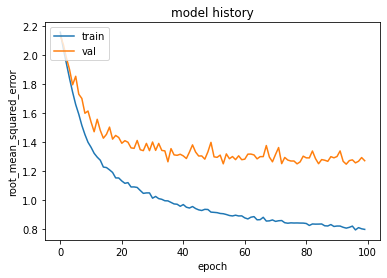

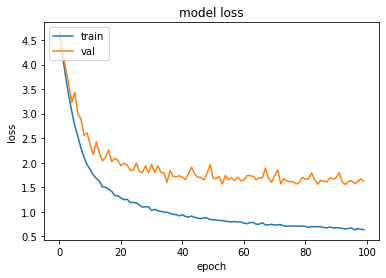

(1.274763822555542, 1.6250228881835938)

In [ ]:
fc_nn.evaluate()

# FC NN - ELU

Configuration for NN:

In [3]:
from tensorflow import keras

nn_configuration = {
    'epochs': epochs,  # number of epochs
    'batch_size': 32,  # size of the batch
    'verbose': 1,  # set the training phase as verbose
    'optimizer': keras.optimizers.Adam(clipvalue=1.0),  # optimizer
    'metrics': ["root_mean_squared_error"],
    'loss': 'mean_squared_error',  # loss
    'val_split': 0.2,  # validation split: percentage of the training data used for evaluating the loss function
    'n_input': 300,
    'input_shape': (300,),
    'n_output': 1  # number of outputs = mfd
}

Create Model:

In [4]:
from gaze_predictor.gaze_predictor.fully_connected import FCNetworkELU

fc_nn_elu = gaze_predictor.gaze_predictor.fully_connected.FCNetworkELU(name='fc_nn_elu', configuration = nn_configuration)
fc_nn_elu.create_model()

Created model for fc_nn_elu:
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (Dense)               (None, 300)               90300     
                                                                 
 Hidden1 (Dense)             (None, 256)               77056     
                                                                 
 Hidden2 (Dense)             (None, 16)                4112      
                                                                 
 Output (Dense)              (None, 1)                 17        
                                                                 
Total params: 171,485
Trainable params: 171,485
Non-trainable params: 0
_________________________________________________________________
None


Train Model:

In [5]:
fc_nn_elu.train()

Epoch 1/100
1487/1487 [==============================] - 14s 9ms/step - loss: 4.6881 - root_mean_squared_error: 2.1652 - val_loss: 4.6403 - val_root_mean_squared_error: 2.1541
Epoch 2/100
1487/1487 [==============================] - 10s 7ms/step - loss: 4.3022 - root_mean_squared_error: 2.0742 - val_loss: 4.2666 - val_root_mean_squared_error: 2.0656
Epoch 3/100
1487/1487 [==============================] - 7s 5ms/step - loss: 3.9218 - root_mean_squared_error: 1.9804 - val_loss: 4.4110 - val_root_mean_squared_error: 2.1002
Epoch 4/100
1487/1487 [==============================] - 8s 5ms/step - loss: 3.5057 - root_mean_squared_error: 1.8724 - val_loss: 3.9507 - val_root_mean_squared_error: 1.9876
Epoch 5/100
1487/1487 [==============================] - 7s 5ms/step - loss: 3.1585 - root_mean_squared_error: 1.7772 - val_loss: 3.6423 - val_root_mean_squared_error: 1.9085
Epoch 6/100
1487/1487 [==============================] - 8s 5ms/step - loss: 2.8244 - root_mean_squared_error: 1.6806 - val

Evaluate Model:

465/465 [==============================] - 1s 2ms/step - loss: 10.4985 - root_mean_squared_error: 3.2401

Test root_mean_squared_error: 3.240138530731201

Test loss: 10.498497009277344


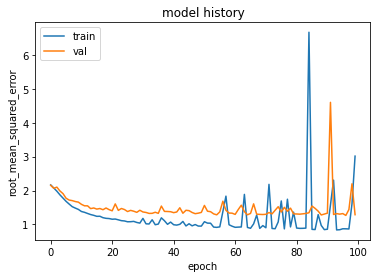

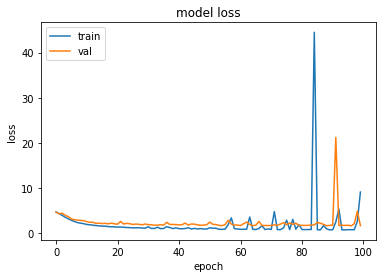

(3.240138530731201, 10.498497009277344)

In [6]:
fc_nn_elu.evaluate()

# FC NN - Dropout

Configuration for NN:

In [7]:
from tensorflow import keras

nn_configuration = {
    'epochs': epochs,  # number of epochs
    'batch_size': 32,  # size of the batch
    'verbose': 1,  # set the training phase as verbose
    'optimizer': keras.optimizers.Adam(clipvalue=1.0),  # optimizer
    'metrics': ["root_mean_squared_error"],
    'loss': 'mean_squared_error',  # loss
    'val_split': 0.2,  # validation split: percentage of the training data used for evaluating the loss function
    'n_input': 300,
    'input_shape': (300,),
    'n_output': 1  # number of outputs = mfd
}

Create Model:

In [8]:
from gaze_predictor.gaze_predictor.fully_connected import FCNetworkDropout

fc_nn_dropout = gaze_predictor.gaze_predictor.fully_connected.FCNetworkDropout(name='fc_nn_dropout', configuration = nn_configuration)
fc_nn_dropout.create_model()

Created model for fc_nn_dropout:
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (Dense)               (None, 300)               90300     
                                                                 
 Hidden1 (Dense)             (None, 256)               77056     
                                                                 
 DropOut1 (Dropout)          (None, 256)               0         
                                                                 
 Hidden2 (Dense)             (None, 16)                4112      
                                                                 
 DropOut2 (Dropout)          (None, 16)                0         
                                                                 
 Output (Dense)              (None, 1)                 17        
                                                                 
Total params: 171,485

Train Model:

In [9]:
fc_nn_dropout.train()

Epoch 1/100
1487/1487 [==============================] - 7s 4ms/step - loss: 5.1924 - root_mean_squared_error: 2.2787 - val_loss: 4.7845 - val_root_mean_squared_error: 2.1874
Epoch 2/100
1487/1487 [==============================] - 6s 4ms/step - loss: 4.6397 - root_mean_squared_error: 2.1540 - val_loss: 4.7206 - val_root_mean_squared_error: 2.1727
Epoch 3/100
1487/1487 [==============================] - 7s 4ms/step - loss: 4.3382 - root_mean_squared_error: 2.0828 - val_loss: 4.3457 - val_root_mean_squared_error: 2.0846
Epoch 4/100
1487/1487 [==============================] - 6s 4ms/step - loss: 4.0363 - root_mean_squared_error: 2.0091 - val_loss: 4.0317 - val_root_mean_squared_error: 2.0079
Epoch 5/100
1487/1487 [==============================] - 6s 4ms/step - loss: 3.8098 - root_mean_squared_error: 1.9519 - val_loss: 3.8354 - val_root_mean_squared_error: 1.9584
Epoch 6/100
1487/1487 [==============================] - 7s 4ms/step - loss: 3.5954 - root_mean_squared_error: 1.8961 - val_l

Evaluate Model:

465/465 [==============================] - 1s 2ms/step - loss: 1.8914 - root_mean_squared_error: 1.3753

Test root_mean_squared_error: 1.3752825260162354

Test loss: 1.891402006149292


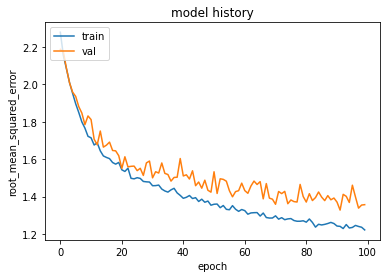

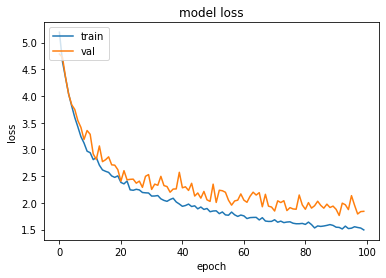

(1.3752825260162354, 1.891402006149292)

In [10]:
fc_nn_dropout.evaluate()

# FC NN - BatchNormalization

Configuration for NN:

In [11]:
from tensorflow import keras

nn_configuration = {
    'epochs': epochs,  # number of epochs
    'batch_size': 32,  # size of the batch
    'verbose': 1,  # set the training phase as verbose
    'optimizer': keras.optimizers.Adam(clipvalue=1.0),  # optimizer
    'metrics': ["root_mean_squared_error"],
    'loss': 'mean_squared_error',  # loss
    'val_split': 0.2,  # validation split: percentage of the training data used for evaluating the loss function
    'n_input': 300,
    'input_shape': (300,),
    'n_output': 1  # number of outputs = mfd
}

Create Model:

In [12]:
from gaze_predictor.gaze_predictor.fully_connected import FCNetworkBatchNormalization

fc_nn_batch_norm = gaze_predictor.gaze_predictor.fully_connected.FCNetworkBatchNormalization(name='fc_nn_batch_norm', configuration = nn_configuration)
fc_nn_batch_norm.create_model()

Created model for fc_nn_batch_norm:
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (Dense)               (None, 300)               90300     
                                                                 
 Hidden1 (Dense)             (None, 256)               77056     
                                                                 
 batch_normalization (BatchN  (None, 256)              1024      
 ormalization)                                                   
                                                                 
 Hidden2 (Dense)             (None, 16)                4112      
                                                                 
 batch_normalization_1 (Batc  (None, 16)               64        
 hNormalization)                                                 
                                                                 
 Output (Dense)   

Train Model:

In [13]:
fc_nn_batch_norm.train()

Epoch 1/100
1487/1487 [==============================] - 9s 5ms/step - loss: 5.5256 - root_mean_squared_error: 2.3507 - val_loss: 4.6612 - val_root_mean_squared_error: 2.1590
Epoch 2/100
1487/1487 [==============================] - 7s 5ms/step - loss: 4.3796 - root_mean_squared_error: 2.0928 - val_loss: 5.2642 - val_root_mean_squared_error: 2.2944
Epoch 3/100
1487/1487 [==============================] - 7s 5ms/step - loss: 4.2738 - root_mean_squared_error: 2.0673 - val_loss: 4.5002 - val_root_mean_squared_error: 2.1214
Epoch 4/100
1487/1487 [==============================] - 7s 5ms/step - loss: 4.1190 - root_mean_squared_error: 2.0295 - val_loss: 4.4740 - val_root_mean_squared_error: 2.1152
Epoch 5/100
1487/1487 [==============================] - 7s 5ms/step - loss: 4.0862 - root_mean_squared_error: 2.0214 - val_loss: 5.1607 - val_root_mean_squared_error: 2.2717
Epoch 6/100
1487/1487 [==============================] - 7s 5ms/step - loss: 4.0926 - root_mean_squared_error: 2.0230 - val_l

Evaluate Model:

465/465 [==============================] - 1s 2ms/step - loss: 1.9588 - root_mean_squared_error: 1.3996

Test root_mean_squared_error: 1.3995556831359863

Test loss: 1.9587560892105103


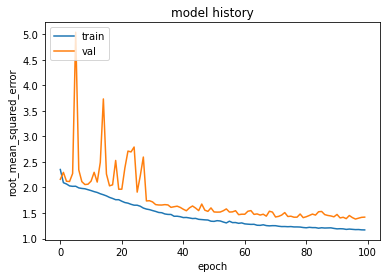

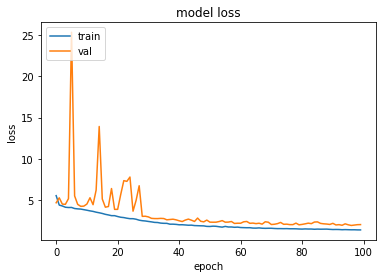

(1.3995556831359863, 1.9587560892105103)

In [14]:
fc_nn_batch_norm.evaluate()

# ConvNet

Configuration for NN:

In [ ]:
from tensorflow import keras

nn_configuration = {
    'epochs': epochs,  # number of epochs
    'batch_size': 32,  # size of the batch
    'verbose': 1,  # set the training phase as verbose
    'optimizer': keras.optimizers.Adam(clipvalue=1.0),  # optimizer
    'metrics': ["root_mean_squared_error"],
    'loss': 'mean_squared_error',  # loss
    'val_split': 0.2,  # validation split: percentage of the training data used for evaluating the loss function
    'input_shape': (15, 20, 1),
    'n_output': 1  # number of outputs = x and y
}

Create Model:

In [ ]:
from gaze_predictor.gaze_predictor.convolutional import ConvNetwork

conv_nn = gaze_predictor.gaze_predictor.convolutional.ConvNetwork(name='conv_nn', configuration = nn_configuration)
conv_nn.create_model()

Train Model:

In [ ]:
conv_nn.train()

Evaluate Model:

In [ ]:
conv_nn.evaluate()

# ConvNet 3D

Configuration for NN:

In [ ]:
from tensorflow import keras

nn_configuration = {
    'epochs': epochs,  # number of epochs
    'batch_size': 32,  # size of the batch
    'verbose': 1,  # set the training phase as verbose
    'optimizer': keras.optimizers.Adam(clipvalue=1.0),  # optimizer
    'metrics': ["root_mean_squared_error"],
    'loss': 'mean_squared_error',  # loss
    'val_split': 0.2,  # validation split: percentage of the training data used for evaluating the loss function
    'input_shape': (15, 20, 3),
    'n_output': 1  # number of outputs = x and y
}

Create Model:

In [ ]:
from gaze_predictor.gaze_predictor.convolutional_3d import ConvNetwork3D

conv_nn_3d = gaze_predictor.gaze_predictor.convolutional_3d.ConvNetwork3D(name='conv_nn_3d', configuration = nn_configuration)
conv_nn_3d.create_model()

Train Model:

In [ ]:
conv_nn_3d.train()

Evaluate Model:

In [ ]:
conv_nn_3d.evaluate()

# Save Models

In [7]:
# fc_nn.save_model()
# conv_nn.save_model()
# conv_nn_3d.save_model()
# fc_nn_dropout.save_model()
# fc_nn_batch_norm.save_model()
fc_nn_elu.save_model()

In [8]:
!zip -r /content/file.zip /content
from google.colab import files
files.download("/content/file.zip")

  adding: content/ (stored 0%)
  adding: content/.config/ (stored 0%)
  adding: content/.config/.last_survey_prompt.yaml (stored 0%)
  adding: content/.config/config_sentinel (stored 0%)
  adding: content/.config/.last_update_check.json (deflated 23%)
  adding: content/.config/active_config (stored 0%)
  adding: content/.config/gce (stored 0%)
  adding: content/.config/configurations/ (stored 0%)
  adding: content/.config/configurations/config_default (deflated 15%)
  adding: content/.config/logs/ (stored 0%)
  adding: content/.config/logs/2022.09.09/ (stored 0%)
  adding: content/.config/logs/2022.09.09/13.21.52.077555.log (deflated 86%)
  adding: content/.config/logs/2022.09.09/13.21.10.547632.log (deflated 91%)
  adding: content/.config/logs/2022.09.09/13.22.20.752199.log (deflated 55%)
  adding: content/.config/logs/2022.09.09/13.22.21.505460.log (deflated 54%)
  adding: content/.config/logs/2022.09.09/13.22.00.334156.log (deflated 54%)
  adding: content/.config/logs/2022.09.09/13.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Put RMSE into relation:

In [ ]:
print(fc_nn.y.min())
print(fc_nn.y.max())

import matplotlib.pyplot as plt
plt.hist(fc_nn.y, bins=60);
plt.xlim(0, 15)